In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/twitter_training.csv')

In [4]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        74682 non-null  int64 
 1   operater  74682 non-null  object
 2   label     74682 non-null  object
 3   tweet     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
def fun_st(value):
  if value=='Positive':
    return 1
  elif value=='Negative':
    return -1
  else:
    return 0
df['label']=df['label'].apply(fun_st)
df['tweet'].fillna('Nan')

,tweet
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
74677,Just realized that the Windows partition of my...
74678,Just realized that my Mac window partition is ...
74679,Just realized the windows partition of my Mac ...
74680,Just realized between the windows partition of...


In [6]:
from collections import Counter

Counter(df['label'])

Counter({1: 20655, 0: 30983, -1: 22358})

In [7]:
x=df.drop('label',axis=1)
y=df['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf_vec = TfidfVectorizer().fit(X_train['tweet'])
X_train_vec = tfidf_vec.transform(X_train['tweet'])
X_test_vec = tfidf_vec.transform(X_test['tweet'])
tfidf_vec1 = TfidfVectorizer().fit(X_train['operater'])
X_train_vec1 = tfidf_vec1.transform(X_train['operater'])
X_test_vec1 = tfidf_vec1.transform(X_test['operater'])

In [34]:
from sklearn.naive_bayes import MultinomialNB
tweet_model = MultinomialNB()
tweet_model.fit(X_train_vec, y_train)
operater_model = MultinomialNB()
operater_model.fit(X_train_vec1, y_train)

tweet_predictions = tweet_model.predict(X_test_vec)
operater_predictions = operater_model.predict(X_test_vec1)

combined_predictions = (tweet_predictions + operater_predictions) / 2

y_pred = combined_predictions.round().astype(int)

(0.6606497659246199, 0.5441891891891892, 0.48972696408158994, None)


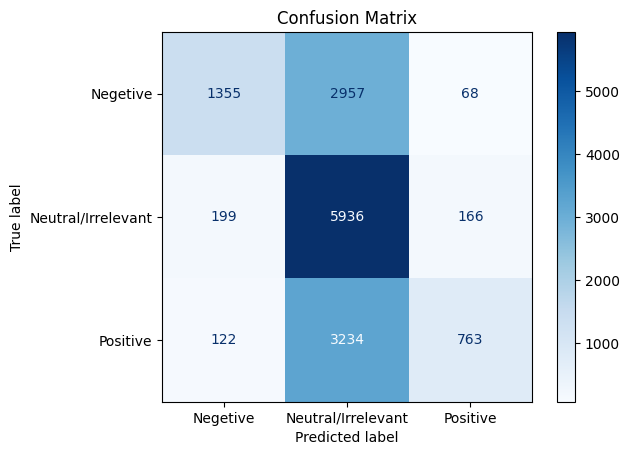

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negetive', 'Neutral/Irrelevant', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_tweet = RandomForestClassifier(max_depth=50, random_state=42)
rf_tweet.fit(X_train_vec,y_train)
rf_operater = RandomForestClassifier(max_depth=50, random_state=42)
rf_operater.fit(X_train_vec1,y_train)
rf_pred1=rf_tweet.predict(X_test_vec)
rf_pred2=rf_operater.predict(X_test_vec1)
rf_pred=(rf_pred1+rf_pred2)/2
y_pred=rf_pred.round().astype(int)

(0.7405656794593926, 0.5516891891891892, 0.48650640028948694, None)


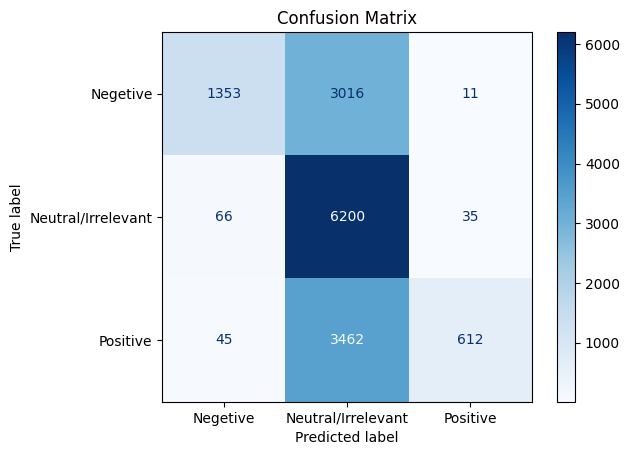

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negetive', 'Neutral/Irrelevant', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf_vec = TfidfVectorizer(max_features=5000).fit(X_train['tweet'])
X_train_vec = tfidf_vec.transform(X_train['tweet'])
X_test_vec = tfidf_vec.transform(X_test['tweet'])
tfidf_vec1 = TfidfVectorizer(max_features=5000).fit(X_train['operater'])
X_train_vec1 = tfidf_vec1.transform(X_train['operater'])
X_test_vec1 = tfidf_vec1.transform(X_test['operater'])

In [15]:
X_train_vf=pd.concat([pd.DataFrame(X_train_vec.todense()),pd.DataFrame(X_train_vec1.todense())],axis=1)
X_test_vf=pd.concat([pd.DataFrame(X_test_vec.todense()),pd.DataFrame(X_test_vec1.todense())],axis=1)

In [16]:
X_train_vf.shape[1]

5038

In [24]:
model=Sequential()
model.add(Dense(128,input_shape=(X_train_vf.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │       644,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 655,907 (2.50 MB)

 Trainable params: 655,907 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
y_train_one_hot = pd.get_dummies(y_train, prefix='label')
y_test_one_hot = pd.get_dummies(y_test, prefix='label')

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_vf,y_train_one_hot,epochs=25,validation_split=0.2)

Epoch 1/25
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.6213 - loss: 0.8089 - val_accuracy: 0.7544 - val_loss: 0.5775
Epoch 2/25
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8191 - loss: 0.4470 - val_accuracy: 0.8360 - val_loss: 0.4212
Epoch 3/25
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9114 - loss: 0.2359 - val_accuracy: 0.8613 - val_loss: 0.4028
Epoch 4/25
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9500 - loss: 0.1358 - val_accuracy: 0.8756 - val_loss: 0.3762
Epoch 5/25
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9628 - loss: 0.0956 - val_accuracy: 0.8799 - val_loss: 0.4155
Epoch 6/25
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9710 - loss: 0.0747 - val_accuracy: 0.8818 - val_loss: 0.4571
Epoch 7/25
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9714 - loss: 0.0704 - val_accuracy: 0.8844 - val_loss: 0.4523
Epoch 8/25
1480/1480 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9764 -

KeyboardInterrupt: 

In [27]:
model.predict(X_test_vf)

463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[1.8482781e-14, 9.9999994e-01, 3.8671179e-13],
       [3.6618868e-09, 9.9999994e-01, 2.3366956e-11],
       [1.6953626e-03, 9.9154145e-01, 6.7632180e-03],
       ...,
       [9.9999994e-01, 5.4917988e-20, 1.4451099e-18],
       [3.7836823e-08, 9.9999994e-01, 1.1655779e-08],
       [1.9794463e-07, 3.0382279e-07, 9.9999946e-01]], dtype=float32)

In [28]:
import numpy as np

y_pred_prob = model.predict(X_test_vf)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
label_map = {0: -1, 1: 0, 2: 1}
y_pred = np.array([label_map[label] for label in y_pred_labels])
print(y_pred)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[ 0  0  0 ... -1  0  1]


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8943918918918919

(0.8943795601260347, 0.8943918918918919, 0.8943093301038711, None)


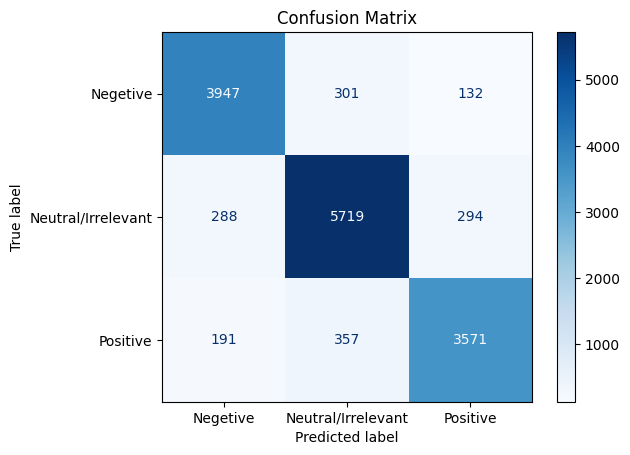

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negetive', 'Neutral/Irrelevant', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [38]:
regr =LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
regr.fit(X_train_vf, y_train)
print(regr.score(X_test_vf, y_test))
y_pred = regr.predict(X_test_vf)

0.7418918918918919


(0.7417749336281573, 0.7418918918918919, 0.7415801627370828, None)


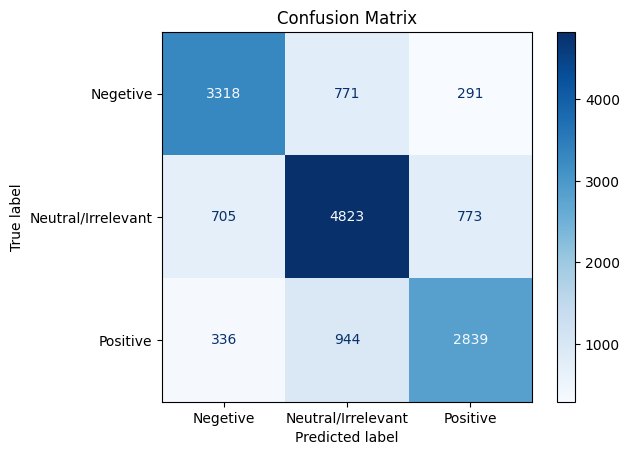

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negetive', 'Neutral/Irrelevant', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()